# Weather Analysis

### Observed trend 1: The closer to the equator a city is, the hotter the temperature would be, ranging from 70-95 degrees.

### Observed trend 2: Also around the equarter, humidity tends to be higher because of the hotter temperate.

### Observed trend 3: For cloudiness, there is no correlation based on latitude. Windspeed also seems to average around 5 MPH.

In [1]:
from citipy import citipy
import numpy as np
import pandas as pd
import seaborn as sns
import json
import requests
import matplotlib.pyplot as plt
import random
import os
import csv
import datetime
import time
from config import api_key
from pprint import pprint

In [2]:
# Create settings parameters
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
# Getting a sample that is representative of the world cities.

# Set Lat & Lon Zones to randomly pick coordinates - So, we have some from each region.
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)


# Creating a new data frame to hold randomly picked coordinates and corresponding city information
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.head(15)

,Latitude,Longitude
0,-173.07,-388.42
1,-173.22,-387.40
2,-167.35,-386.47
3,-174.26,-395.85
4,-168.05,-396.02
5,-168.06,-393.02
6,-166.57,-396.27
7,-168.15,-393.90
8,-174.75,-388.17
9,-167.08,-394.95


In [4]:
# For the selected coordinates, use citipy to associate them with nearest city.

cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.at[index,"Closest City name"]= city.city_name
    cities_df.at[index,"Closest Country code"] = city.country_code

In [5]:
# Dropping random lat and lon samples from dataframe as they are not the exact coordinates for the cities.

clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Dropping duplicate cities which may have resulted in the previous step
clean_cities_df = clean_cities_df.drop_duplicates()

clean_cities_df.head(15)

,Closest City name,Closest Country code
0,vaini,to
400,punta arenas,cl
402,mataura,pf
419,ushuaia,ar
700,bredasdorp,za
750,port alfred,za
751,port elizabeth,za
800,albany,au
850,hobart,au
900,bluff,nz


In [6]:
# Picking a sample of 500 cities to proceed with analysis
selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)

## Fetch City Weather Info from OpenWeatherAPI

In [7]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"
app_id = api_key
params = { "appid" :app_id,"units":"imperial" }

In [8]:
query_url = f"{base_url}appid={api_key}&units={units}&q="

counter = 0 + 1

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for city #{counter} | {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(city_weather_resp.url)
    city_weather_resp  = city_weather_resp.json()
    counter = counter + 1   
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Date",city_weather_resp.get("dt"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))
    
    

Retrieving weather information for city #1 | provideniya,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=provideniya%2Cru
Retrieving weather information for city #2 | nantucket,us


C:\Users\kryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\kryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\kryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\kryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\kryst\AppData\Local\Continuum\ana

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nantucket%2Cus
Retrieving weather information for city #3 | minudasht,ir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=minudasht%2Cir
Retrieving weather information for city #4 | north bend,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=north+bend%2Cus
Retrieving weather information for city #5 | ghanzi,bw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ghanzi%2Cbw
Retrieving weather information for city #6 | hofn,is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hofn%2Cis
Retrieving weather information for city #7 | winnemucca,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=winnemucca%2Cus
Retrieving wea

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=anar+darreh%2Caf
Retrieving weather information for city #50 | roebourne,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roebourne%2Cau
Retrieving weather information for city #51 | bandarbeyla,so
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bandarbeyla%2Cso
Retrieving weather information for city #52 | gorontalo,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gorontalo%2Cid
Retrieving weather information for city #53 | ituni,gy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ituni%2Cgy
Retrieving weather information for city #54 | kuche,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kuche%2Ccn
Retriev

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bouna%2Cci
Retrieving weather information for city #97 | mys shmidta,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mys+shmidta%2Cru
Retrieving weather information for city #98 | leningradskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=leningradskiy%2Cru
Retrieving weather information for city #99 | kendallville,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kendallville%2Cus
Retrieving weather information for city #100 | manuk mangkaw,ph
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manuk+mangkaw%2Cph
Retrieving weather information for city #101 | shakawe,bw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=i

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lardos%2Cgr
Retrieving weather information for city #144 | chateaubelair,vc
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chateaubelair%2Cvc
Retrieving weather information for city #145 | grafton,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=grafton%2Cau
Retrieving weather information for city #146 | marabba,sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marabba%2Csd
Retrieving weather information for city #147 | columbus,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=columbus%2Cus
Retrieving weather information for city #148 | pesochnyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pesochnyy%2C

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port-de-bouc%2Cfr
Retrieving weather information for city #191 | liangxiang,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=liangxiang%2Ccn
Retrieving weather information for city #192 | mahebourg,mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mahebourg%2Cmu
Retrieving weather information for city #193 | brewster,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=brewster%2Cus
Retrieving weather information for city #194 | trairi,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=trairi%2Cbr
Retrieving weather information for city #195 | caravelas,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=caravelas%

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lasa%2Ccn
Retrieving weather information for city #238 | kolimvari,gr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kolimvari%2Cgr
Retrieving weather information for city #239 | matara,lk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=matara%2Clk
Retrieving weather information for city #240 | shetpe,kz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=shetpe%2Ckz
Retrieving weather information for city #241 | sabzevar,ir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sabzevar%2Cir
Retrieving weather information for city #242 | tshane,bw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tshane%2Cbw
Retrieving weathe

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aksu%2Ccn
Retrieving weather information for city #286 | texarkana,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=texarkana%2Cus
Retrieving weather information for city #287 | labuhan,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=labuhan%2Cid
Retrieving weather information for city #288 | fallon,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fallon%2Cus
Retrieving weather information for city #289 | vila,vu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vila%2Cvu
Retrieving weather information for city #290 | villanueva de la serena,es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=villanueva+de+la+s

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bokspits%2Cbw
Retrieving weather information for city #333 | segou,ml
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=segou%2Cml
Retrieving weather information for city #334 | zaranj,af
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zaranj%2Caf
Retrieving weather information for city #335 | alakurtti,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=alakurtti%2Cru
Retrieving weather information for city #336 | kang,bw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kang%2Cbw
Retrieving weather information for city #337 | phalaborwa,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=phalaborwa%2Cza
Retrieving weat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=solenzo%2Cbf
Retrieving weather information for city #380 | oistins,bb
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=oistins%2Cbb
Retrieving weather information for city #381 | raudeberg,no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=raudeberg%2Cno
Retrieving weather information for city #382 | le port,re
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=le+port%2Cre
Retrieving weather information for city #383 | ano mera,gr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ano+mera%2Cgr
Retrieving weather information for city #384 | kamaishi,jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kamaishi%2Cjp
Retrie

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=radcliff%2Cus
Retrieving weather information for city #427 | alexandria,eg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=alexandria%2Ceg
Retrieving weather information for city #428 | srednekolymsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=srednekolymsk%2Cru
Retrieving weather information for city #429 | port blair,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port+blair%2Cin
Retrieving weather information for city #430 | san lorenzo,ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san+lorenzo%2Car
Retrieving weather information for city #431 | kysyl-syr,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=monteagudo%2Cbo
Retrieving weather information for city #474 | kushiro,jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kushiro%2Cjp
Retrieving weather information for city #475 | port hedland,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port+hedland%2Cau
Retrieving weather information for city #476 | itarema,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=itarema%2Cbr
Retrieving weather information for city #477 | huescar,es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=huescar%2Ces
Retrieving weather information for city #478 | inta,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inta%2Cru
Retriev

In [9]:
# Drop cities with missing information
selected_cities = selected_cities.dropna()

selected_cities.to_csv("500 City_Weather_data.csv")

## Weather Plots

In [33]:
# Plot settings
def set_plot(x_title,x_lim,y_title):
    plt.title(f"{x_title} vs {y_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)
    sns.set(style="darkgrid", rc={"figure.figsize": (10, 10)})
    sns.set_context("talk", font_scale=1.35)

### 1. Latitude vs Temperature Plot

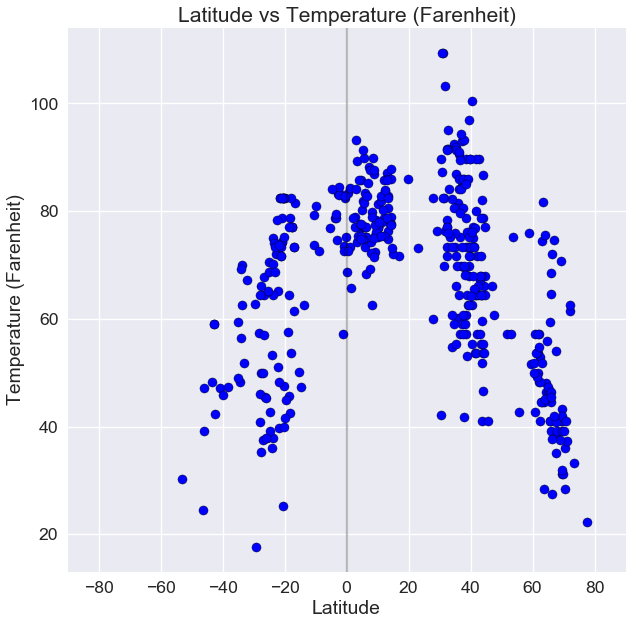

In [35]:
plt.scatter(selected_cities["Latitude"], selected_cities["Temperature"], marker="o", color="b", edgecolor="black")
set_plot("Latitude",[-90,90],"Temperature (Farenheit)")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Latitude vs Temperature Plot.png")
plt.show()

### 2. Latitude vs Humidity plot

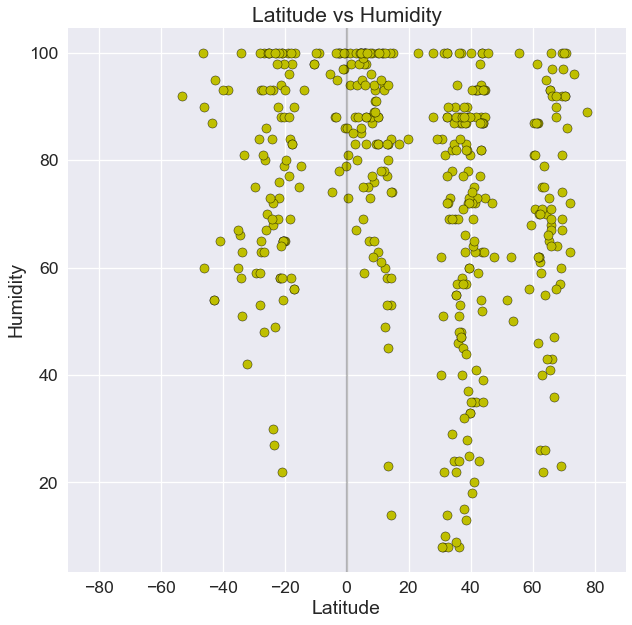

In [36]:
plt.scatter(selected_cities["Latitude"], selected_cities["Humidity"], marker="o", color="y", edgecolor="black")
set_plot("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Latitude vs Humidity Plot.png")
plt.show()

### 3. Latitude vs Cloudiness plot

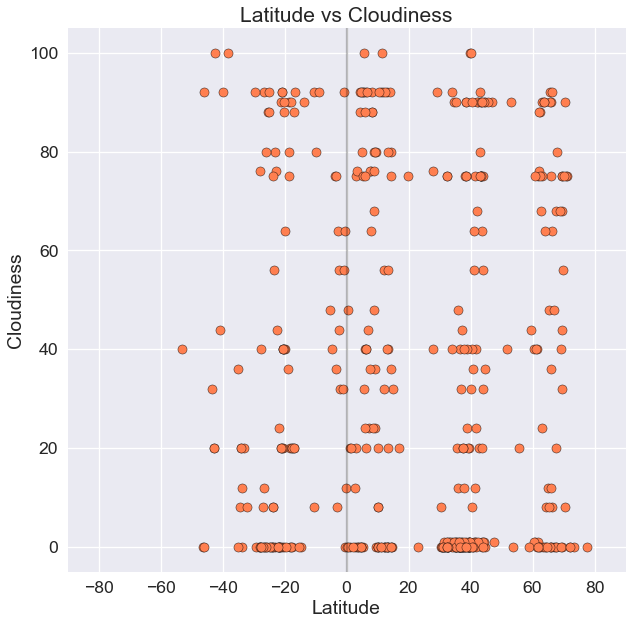

In [37]:
plt.scatter(selected_cities["Latitude"], selected_cities["Cloudiness"], marker="o", color="coral", edgecolor="black")
set_plot("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Latitude vs Cloudiness Plot.png")
plt.show()

### 4. Latitude vs Wind Speed plot

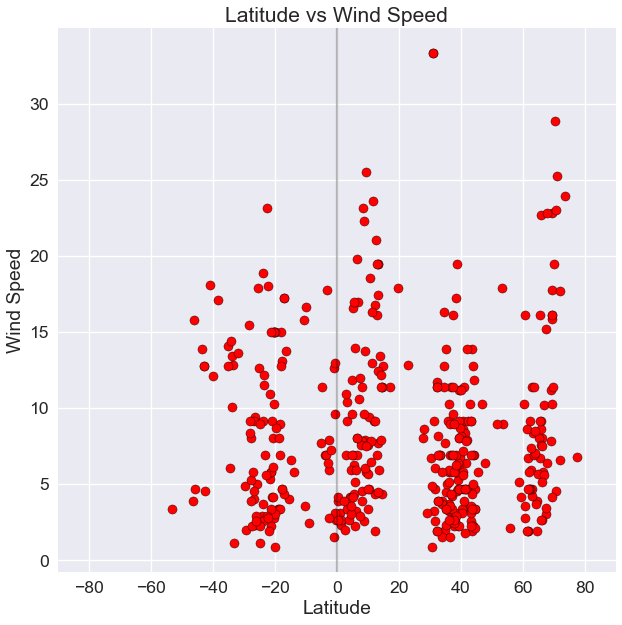

In [38]:
plt.scatter(selected_cities["Latitude"], selected_cities["Wind speed"], marker="o", color="r", edgecolor="black")
set_plot("Latitude",[-90,90],"Wind Speed")
plt.axvline(0, color='black',alpha=0.25)
plt.savefig("Latitude vs Wind Speed Plot.png")
plt.show()